# 🚀 **XGBoost: eXtreme Gradient Boosting**
---

<div style="background: linear-gradient(135deg, #1e3a8a 0%, #3b82f6 100%); padding: 25px; border-radius: 15px; margin: 20px 0;">
    <h2 style="color: white; margin: 0; text-align: center;">The Ultimate Guide to Classification & Regression</h2>
    <p style="color: #e0e7ff; text-align: center; margin-top: 10px; font-size: 16px;">Master the algorithm that wins Kaggle competitions!</p>
</div>

## 📚 Table of Contents

1. [Introduction to XGBoost](#1-introduction)
2. [XGBoost Classification](#2-classification)
3. [XGBoost Regression](#3-regression)
4. [Classification vs Regression](#4-comparison)
5. [Hyperparameters](#5-hyperparameters)
6. [Quick Revision Cheatsheet](#6-cheatsheet)

---
<a id='1-introduction'></a>
## 1. 🎯 Introduction to XGBoost

### What is XGBoost?

> **XGBoost** = **eXtreme Gradient Boosting**  
> A powerful machine learning algorithm that creates **sequential decision trees** where each new tree learns from the mistakes of previous ones.

### Key Capabilities

| Problem Type | ✅ Supported |
|:-------------|:------------:|
| Binary Classification | ✅ |
| Multi-class Classification | ✅ |
| Regression | ✅ |

### Why XGBoost is Special

| Feature | Benefit |
|:--------|:--------|
| ⚡ **Speed** | Extremely fast computation |
| 🏆 **Performance** | Wins most Kaggle competitions |
| 🛡️ **Regularization** | Built-in to prevent overfitting |
| 🧩 **Flexibility** | Works for both classification & regression |

---
<a id='2-classification'></a>
## 2. 🏷️ XGBoost Classification

### 2.1 Sample Dataset: Credit Card Approval

| # | Salary | Credit Score | Approval (y) |
|:-:|:------:|:------------:|:------------:|
| 1 | ≤ 50K | Bad | 0 |
| 2 | ≤ 50K | Good | 1 |
| 3 | ≤ 50K | Good | 1 |
| 4 | > 50K | Bad | 0 |
| 5 | > 50K | Good | 1 |
| 6 | > 50K | Normal | 1 |
| 7 | ≤ 50K | Normal | 0 |

### 2.2 The 6-Step XGBoost Classification Process

```
┌─────────────────────────────────────────────────────────────┐
│  Step 1: Create Base Model (Probability = 0.5)              │
├─────────────────────────────────────────────────────────────┤
│  Step 2: Calculate Residuals                                │
├─────────────────────────────────────────────────────────────┤
│  Step 3: Construct Decision Tree                            │
├─────────────────────────────────────────────────────────────┤
│  Step 4: Calculate Similarity Weight                        │
├─────────────────────────────────────────────────────────────┤
│  Step 5: Calculate Gain                                     │
├─────────────────────────────────────────────────────────────┤
│  Step 6: Repeat with New Residuals                          │
└─────────────────────────────────────────────────────────────┘
```

---
### 📌 STEP 1: Create Base Model

For **Binary Classification**, the base model starts with a **neutral probability**:

$$\Large \boxed{P = 0.5}$$

> 💡 **Why 0.5?** The model is not biased towards any class initially. It predicts 50% chance for each class.

---
### 📌 STEP 2: Calculate Residuals

**Residual** = Actual Value − Predicted Value

$$\Large \boxed{r_i = y_i - \hat{y}}$$

| Record | Actual (y) | Predicted (ŷ) | Residual (r₁) |
|:------:|:----------:|:-------------:|:-------------:|
| 1 | 0 | 0.5 | **−0.5** |
| 2 | 1 | 0.5 | **+0.5** |
| 3 | 1 | 0.5 | **+0.5** |
| 4 | 0 | 0.5 | **−0.5** |
| 5 | 1 | 0.5 | **+0.5** |
| 6 | 1 | 0.5 | **+0.5** |
| 7 | 0 | 0.5 | **-0.5** |

---
### 📌 STEP 3 & 4: Construct Tree & Calculate Similarity Weight

Now we build a decision tree using **Residuals as the target variable**!

<div style="background-color: #166534; color: white; padding: 20px; border-radius: 10px; margin: 15px 0;">
    <h4 style="margin-top: 0;">📐 Similarity Weight Formula (Classification)</h4>
    
$$\Large \text{Similarity Weight} = \frac{\left(\sum \text{Residuals}\right)^2}{\sum\left[P(1-P)\right] + \lambda}$$
</div>

**Where:**
- $\sum \text{Residuals}$ = Sum of all residuals in that node
- $P$ = Probability from base model (0.5)
- $\lambda$ = Regularization parameter (hyperparameter)

#### Example Calculation: Let's spli on Salary(<= 50K Vs >50K)

**For Left Child ( <=50K)** (with residuals: −0.5, +0.5, +0.5, −0.5):

$$\text{SW}_{\text{left}} = \frac{(-0.5 + 0.5 + 0.5 - 0.5)^2}{4 \times (0.5 \times 0.5)} = \frac{0^2}{1} = \mathbf{0}$$

**For Right Child ( >50K)** (with residuals: −0.5, +0.5, +0.5):

$$\text{SW}_{\text{right}} = \frac{(-0.5 + 0.5 + 0.5)^2}{3 \times (0.5 \times 0.5)} = \frac{0.25}{0.75} = \mathbf{0.33}$$

**For Root Node ( <=50K Vs >50K)** (with residuals: −0.5, +0.5, +0.5, −0.5, −0.5, 0.5, 0.5):

$$\text{SW}_{\text{right}} = \frac{(-0.5 + 0.5 + 0.5 - 0.5 - 0.5 + 0.5 + 0.5)^2}{4 \times (0.5 \times 0.5)+3 \times (0.5 \times 0.5)} = \frac{0.25}{1.75} = \mathbf{0.14}$$

### Decision Tree Structure

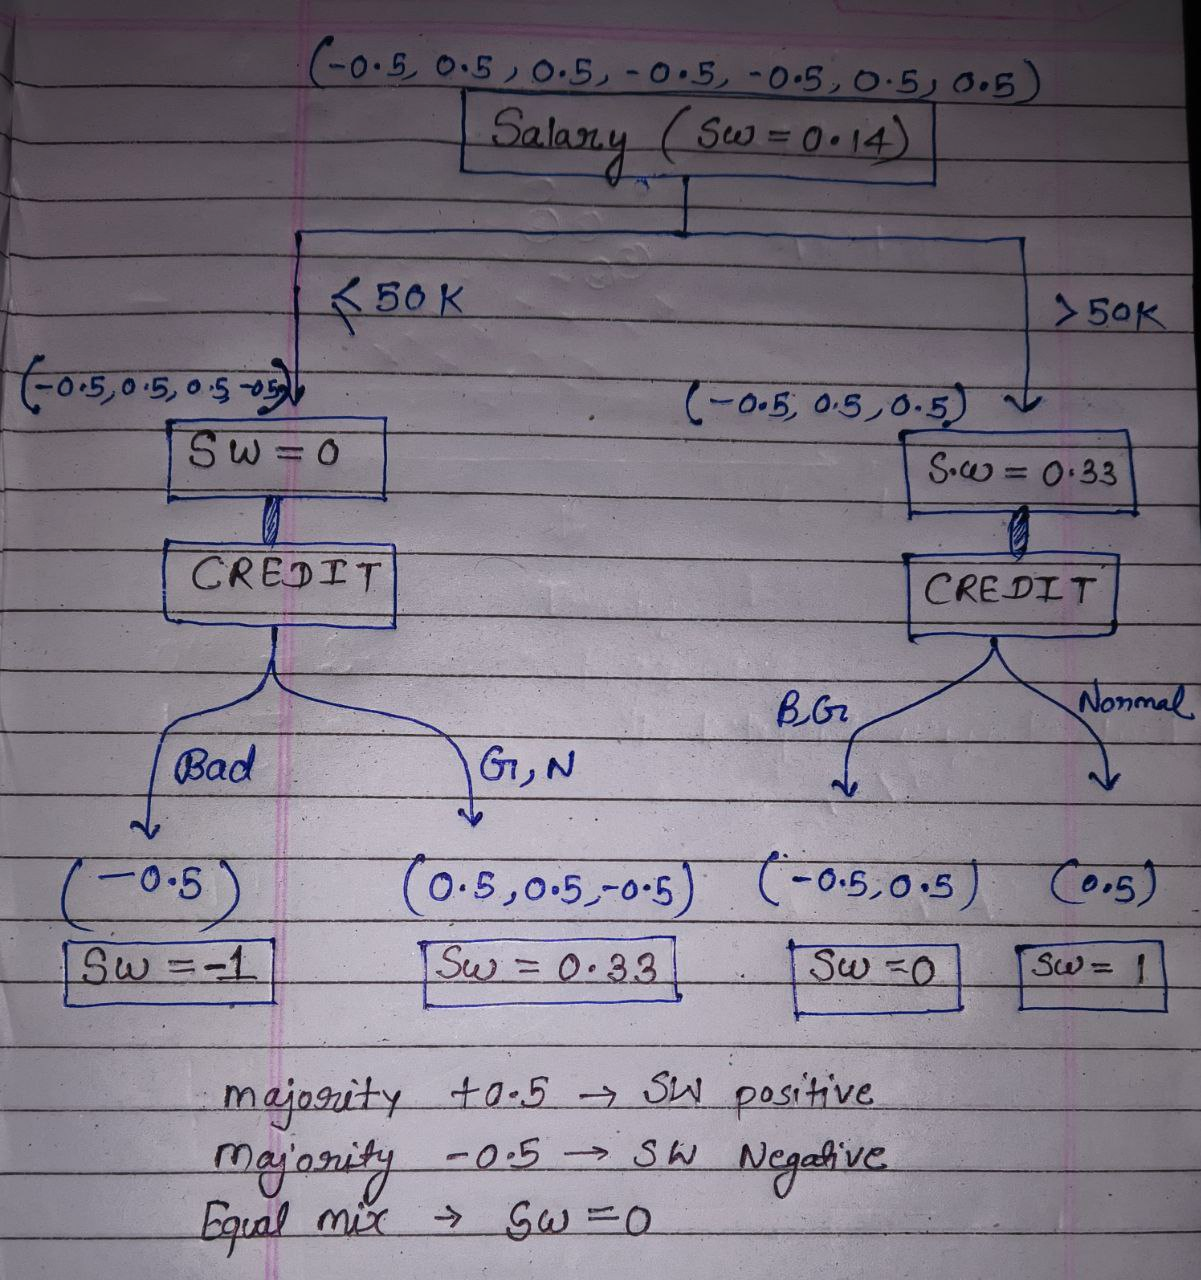
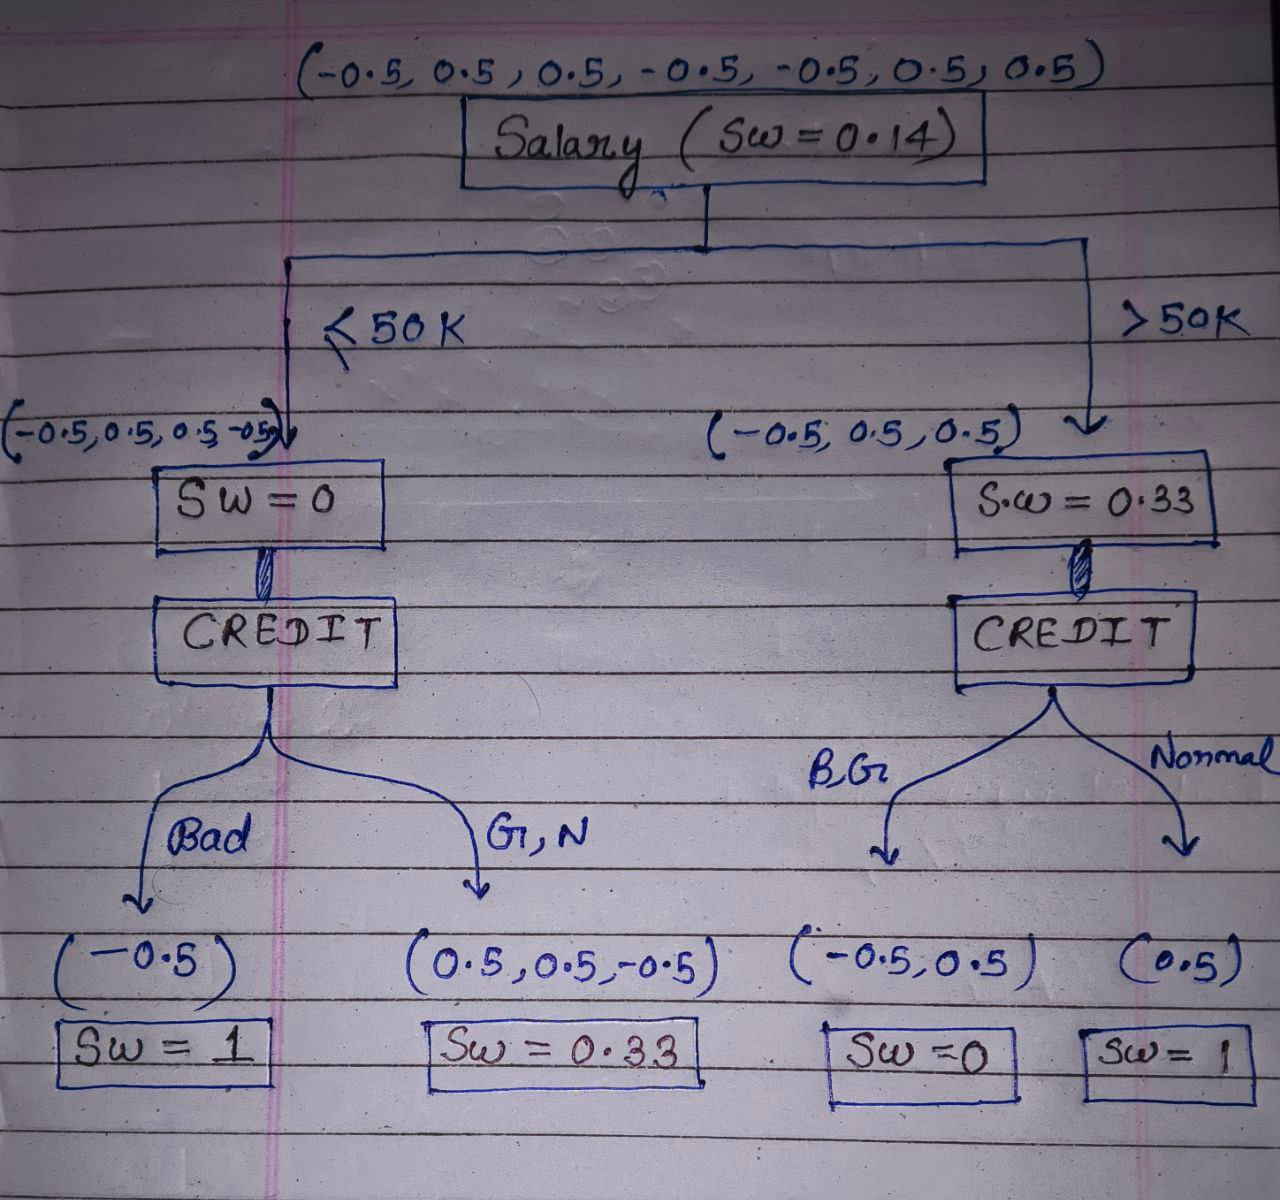

---
### 📌 STEP 5: Calculate Gain

**Gain** tells us how good a split is!

<div style="background-color: #166534; color: white; padding: 20px; border-radius: 10px; margin: 15px 0;">
    <h4 style="margin-top: 0;">📐 Gain Formula</h4>
    
$$\Large \boxed{\text{Gain} = \text{SW}_{\text{Left}} + \text{SW}_{\text{Right}} - \text{SW}_{\text{Root}}}$$
</div>

**Example:**
$$\text{Gain} = 0 + 0.33 - 0.14 = \mathbf{0.19}$$

> ⭐ **Rule: The Higher the Gain, the Better the Split!**

---
### 📌 Making Final Predictions

Before making predictions, understand these **two key concepts**:

#### 1. Log of Odds (for Base Model output):

$$\text{Log Odds} = \log\left(\frac{P}{1-P}\right) = \log\left(\frac{0.5}{0.5}\right) = \log(1) = \mathbf{0}$$

**Note :** Here log is with the base 10.i.e ln().

#### 2. Sigmoid Activation Function (for final probability):

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

<div style="background-color: #1e3a8a; color: white; padding: 20px; border-radius: 10px; margin: 15px 0;">
    <h4 style="margin-top: 0;">🎯 Final Prediction Formula (Classification)</h4>
    
$$\Large \hat{y} = \sigma\left(\underbrace{\text{Log Odds}}_{\text{Base Model}} + \underbrace{\alpha_1 \cdot \text{SW}_1}_{\text{Tree 1}} + \underbrace{\alpha_2 \cdot \text{SW}_2}_{\text{Tree 2}} + \cdots\right)$$

<p style="margin-bottom: 0;">Where α is the <strong>learning rate</strong> (typically 0.1 to 0.3)</p>
</div>

---
<a id='6-cheatsheet'></a>
## 6. 📋 Quick Revision Cheatsheet

<div style="background-color: #1e3a8a; color: white; padding: 25px; border-radius: 15px; margin: 15px 0;">
    <h3 style="margin-top: 0; text-align: center;">🧠 XGBoost Master Formulas</h3>
</div>

### Core Formulas

| Formula | Expression |
|:--------|:-----------|
| **Residual** | $r = y - \hat{y}$ |
| **Gain** | $SW_L + SW_R - SW_{Root}$ |
| **Sigmoid** | $\sigma(x) = \frac{1}{1+e^{-x}}$ |
| **Log Odds** | $\log\left(\frac{P}{1-P}\right)$ |

### Similarity Weight

| Type | Formula |
|:-----|:--------|
| **Classification** | $\displaystyle\frac{(\sum r)^2}{\sum P(1-P) + \lambda}$ |
| **Regression** | $\displaystyle\frac{(\sum r)^2}{n + \lambda}$ |

### Final Predictions

| Type | Formula |
|:-----|:--------|
| **Classification** | $\hat{y} = \sigma(\text{LogOdds} + \sum \alpha_i \cdot SW_i)$ |
| **Regression** | $\hat{y} = \text{Average} + \sum \alpha_i \cdot \text{Output}_i$ |

---
<div style="background: linear-gradient(135deg, #166534 0%, #22c55e 100%); padding: 30px; border-radius: 15px; text-align: center;">
    <h2 style="color: white; margin: 0;">🎉 Congratulations!</h2>
    <p style="color: #dcfce7; font-size: 18px; margin-top: 15px;">You've mastered XGBoost! Now go ace those interviews! 🚀</p>
</div>